In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

from scipy.stats import zscore

import seaborn as sns

In [2]:
data = pd.read_csv('clean_with_air.csv')

In [3]:
data.head(3)

,Unnamed: 0,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,...,Death_rate_household_air_pol,Death_rate_all_causes,Death_actual_ozone,Death_actual_particulate,Death_actual_household,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49
0,0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.0,0.02,...,98.112348,46.051505,73.711348,949.199276,2033.148497,172.433312,5.975427,271.661092,512.126572,60.714220
1,1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.4,0.01,...,81.760043,37.768185,63.413417,828.043002,1792.207903,127.035936,4.580403,240.740486,469.406670,49.692924
2,2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.2,0.01,...,80.923134,38.585679,58.832538,858.066586,1795.573829,113.537473,4.373679,255.560407,491.357876,52.069689


In [9]:
df = data.drop(columns = ['Unnamed: 0', 'Entity'])

In [10]:
data.isnull().sum()

Unnamed: 0                      0
Entity                          0
Year                            0
Deaths %                        0
CO2 Emissions                   0
CO2 Emissions Per Cap           0
Food Emissions                  0
Total GHG                       0
Consumption of Ozone            0
Shared CO2 Emissions            0
Transport                       0
Death_rate_ambient_ozone_pol    0
Death_rate_household_air_pol    0
Death_rate_all_causes           0
Death_actual_ozone              0
Death_actual_particulate        0
Death_actual_household          0
Death_under5                    0
Death_5-14                      0
Death_50-69                     0
Death_70+                       0
Death_15-49                     0
dtype: int64

In [29]:
df.shape

(2658, 21)

In [15]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()
df_sc = ss.fit_transform(df)



array([[-1.59686082,  1.39274063, -0.25649491, ..., -0.23011028,
        -0.18740543, -0.24954037],
       [-1.01296894,  1.22022274, -0.2592441 , ..., -0.23105735,
        -0.18806345, -0.25091018],
       [-0.86699597,  1.17825259, -0.25933729, ..., -0.23060343,
        -0.18772533, -0.25061478],
       ...,
       [ 1.46857156, -0.10496212, -0.25184718, ..., -0.21443314,
        -0.18433082, -0.22493594],
       [ 1.61454453, -0.05548318, -0.24681955, ..., -0.21317972,
        -0.18389309, -0.22391278],
       [ 1.7605175 , -0.0205627 , -0.24673124, ..., -0.21193042,
        -0.183492  , -0.22225229]])

In [66]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(distance_threshold=None, affinity='euclidean',  linkage='average', n_clusters =10)


model.fit(df_sc)

AgglomerativeClustering(linkage='average', n_clusters=10)

In [67]:
model.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
df['labels'] = model.labels_

In [69]:
df.labels.value_counts()

1    2545
0      24
8      23
3      19
2      14
7      13
5      10
6       5
4       4
9       1
Name: labels, dtype: int64

In [30]:
df_clust = df.groupby(['labels'])

In [31]:
df.shape

(2658, 21)

In [32]:
df_clust.head(100)

,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,...,Death_rate_all_causes,Death_actual_ozone,Death_actual_particulate,Death_actual_household,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49,labels
0,1991,17.613636,4228256,1.2889,4.011691e+06,9.030000e+06,0.00,0.02,5.000000e+05,4.360865,...,46.051505,73.711348,949.199276,2033.148497,172.433312,5.975427,271.661092,512.126572,60.714220,1
1,1995,16.789055,2066496,0.6638,4.861321e+06,7.480000e+06,43.40,0.01,6.000000e+05,3.420271,...,37.768185,63.413417,828.043002,1792.207903,127.035936,4.580403,240.740486,469.406670,49.692924,1
2,1996,16.588451,1993216,0.6432,4.569703e+06,7.280000e+06,43.20,0.01,6.000000e+05,3.079414,...,38.585679,58.832538,858.066586,1795.573829,113.537473,4.373679,255.560407,491.357876,52.069689,1
3,1997,15.081361,1531552,0.4941,4.431657e+06,6.510000e+06,45.20,0.01,5.000000e+05,3.023884,...,39.243796,59.782109,898.700084,1757.484535,105.434149,4.414006,269.448518,521.197486,57.988035,1
4,1998,15.965796,1744064,0.5607,4.344062e+06,6.810000e+06,49.60,0.01,7.000000e+05,2.600204,...,40.057266,53.195387,943.590146,1691.903067,99.530736,4.493629,280.472022,547.315668,64.973478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,2009,2.997720,5478209686,17.8847,1.489593e+09,5.865860e+09,4285.20,17.33,1.622500e+09,2.758361,...,13.606110,13085.256012,61679.928779,205.178258,771.000475,4.959677,21262.264946,49012.653749,3714.305944,0
2494,2010,2.854517,5675786435,18.3676,1.500705e+09,6.111810e+09,2332.50,17.02,1.679800e+09,2.710908,...,12.570955,13171.292592,58311.889071,193.582510,713.345956,4.338604,20436.658952,46948.904467,3379.933684,0
2495,2011,2.782746,5540173478,17.7807,1.533755e+09,6.235850e+09,1629.78,16.07,1.633600e+09,2.935783,...,11.932344,14580.398939,56524.604217,186.217489,692.850103,4.170049,20358.642782,46873.507932,3175.832290,0
2496,2012,2.656376,5338698344,16.9998,1.448819e+09,5.936090e+09,-67.80,15.26,1.597500e+09,2.798086,...,11.277427,14225.973551,54581.351016,178.188240,674.958570,3.911759,19943.839678,45246.089140,2938.525420,0


In [34]:
df_clust.mean()

,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,Death_rate_household_air_pol,Death_rate_all_causes,Death_actual_ozone,Death_actual_particulate,Death_actual_household,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49
labels,,,,,,,,,,,,,,,,,,,,
0,1999.604651,11.604666,4.761715e+09,13.070816,1.526904e+09,5.358882e+09,62073.359535,18.011395,1.011267e+09,8.867990,52.160467,49.702915,58747.355817,3.463433e+05,417615.160839,14800.263869,432.668022,116470.724693,246936.125446,26450.876765
1,2001.956288,10.923117,1.082585e+08,5.161772,1.073901e+08,2.020842e+08,1247.445004,0.391461,2.035230e+07,2.479965,64.976973,55.975959,1101.430907,1.412719e+04,21768.425304,2103.527615,56.748919,5048.160559,6576.967381,1443.212759
2,2010.000000,19.517517,8.605079e+09,6.278200,2.308477e+09,9.819426e+09,20406.164286,25.732857,5.872429e+08,12.688985,49.450038,94.383105,136668.255282,1.168677e+06,598699.366239,13037.932971,386.284091,359631.139028,847039.296093,85250.626125


In [49]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from scipy.spatial.distance import pdist

In [50]:
Z = linkage(df_sc, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_sc))

c

0.9583233157758574

Wall time: 19.1 s


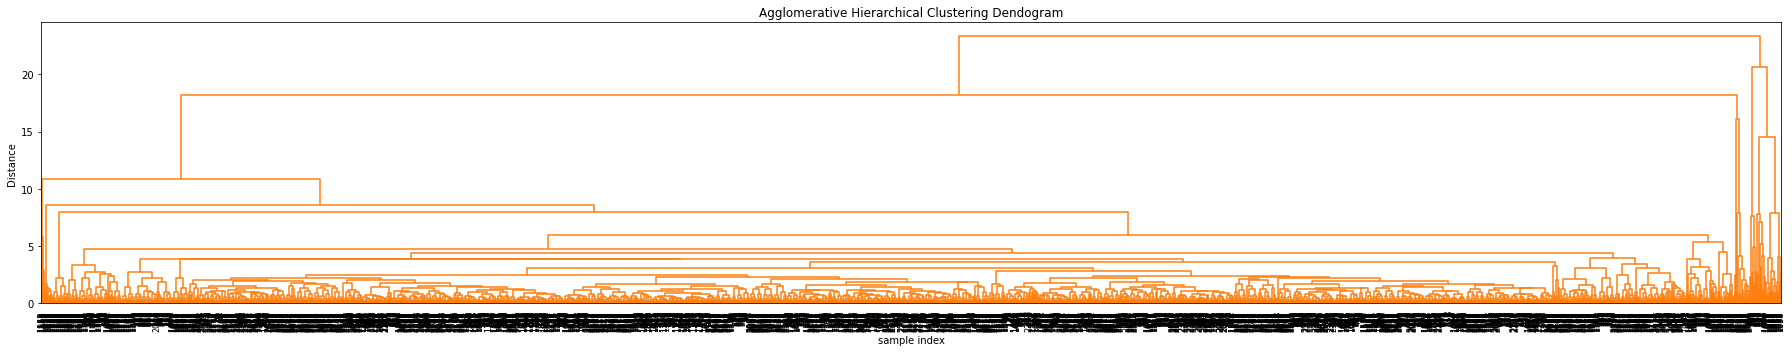

In [70]:
%%time
plt.figure(figsize=(25, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, truncate_mode ='level' ,leaf_font_size=8. )
plt.tight_layout()

In [40]:
Z = linkage(df_sc, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_sc))

c

0.9259660866546814

Wall time: 18.3 s


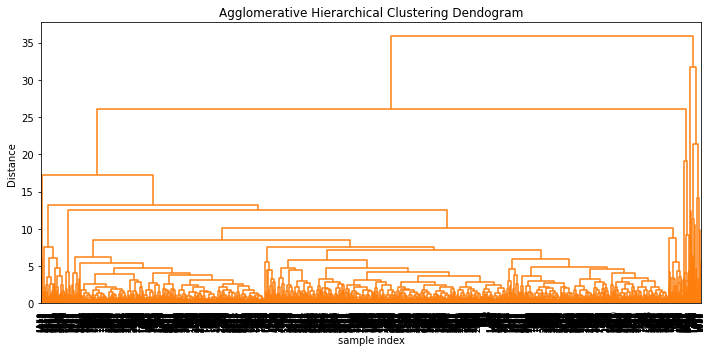

In [41]:
%%time
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [42]:
Z = linkage(df_sc, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_sc))

c

0.7465843884146193

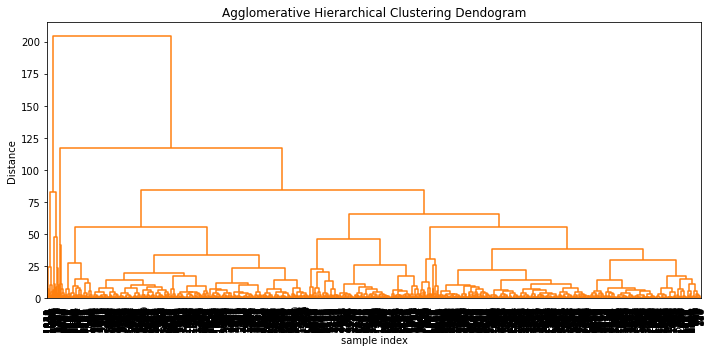

In [43]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [44]:
Z = linkage(df_sc, metric='', method='average')
c, coph_dists = cophenet(Z , pdist(df_sc))

c

ValueError: Unknown Distance Metric: manhattan

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()